# CROC-CARIB12-Default
## Regional CESM-MOM6 for Caribbean with Default CrocoDash Grids and Inputs

This notebook is working off of a basic version of CARIB12 (Seijo-Ellis et al. 2024). The goal of this first test is to run the same domain over a short time period from January 1st, 2000 to January 5th, 2000 and compare with CARIB12. We are using the same grids and resolution, but the topography, CESM version, and tidal data are the different. This also uses the built in CrocoDash feature to generate a custom script to fetch glroys data using the copernicusmarine CLI; this should be the same as Gio's data (need to verify).

## Generate Regional MOM6 Domain

### Horizontal Grid

In [1]:
from CrocoDash.grid import Grid

grid = Grid(
    resolution=1/12, # 1/12 deg resolution (hopefully fraction doesn't cause an issue)
    xstart=261.5, # 261.5° E or 98.5° W 
    lenx=63, # 35.5° W
    ystart=-6, # 6° S
    leny=38, # 32° N
    name='CrocCaribDefault'
)

### Bathymetry

In [7]:
from CrocoDash.topo import Topo

topo = Topo(
    grid = grid,
    min_depth=10, # 10 meters defined by Gio in /glade/work/ajanney/CaribCrocoDash/INPUT_Gio/INPUT/topo.carib_012v1.SRTM15_V2.4.SmL2.0_C2.0_edited_v3.nc
)

In [ ]:
bathymetry_path = '/glade/work/ajanney/CrocoDashData/inputs/bathymetry/GEBCO_2024.nc'

topo.interpolate_from_file(
    file_path=bathymetry_path,
    longitude_coordinate_name='lon',
    latitude_coordinate_name='lat',
    vertical_coordinate_name='elevation'
)

Begin regridding bathymetry...

Original bathymetry size: 1150.35 Mb
Regridded size: 8.27 Mb
Automatic regridding may fail if your domain is too big! If this process hangs or crashes,open a terminal with appropriate computational and resources try calling ESMF directly in the input directory None via

`mpirun -np NUMBER_OF_CPUS ESMF_Regrid -s bathymetry_original.nc -d bathymetry_unfinished.nc -m bilinear --src_var depth --dst_var depth --netcdf4 --src_regional --dst_regional`

For details see https://xesmf.readthedocs.io/en/latest/large_problems_on_HPC.html

Afterwards, we run the 'expt.tidy_bathymetry' method to skip the expensive interpolation step, and finishing metadata, encoding and cleanup.





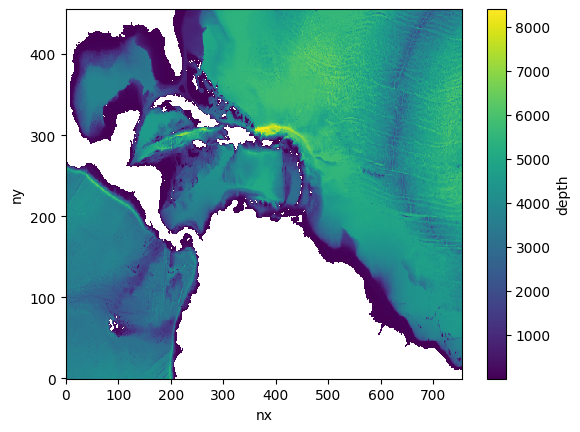

In [4]:
topo.depth.plot()

In [5]:
# Erase Pacific & Canada Bays
%matplotlib ipympl
from CrocoDash.topo_editor import TopoEditor
topo.depth["units"] = "m"
TopoEditor(topo)

TopoEditor(children=(VBox(children=(HTML(value='<h2>Topo Editor</h2>'), HTML(value='<hr><h3>Display</h3>'), To…